In [1]:
!pip install numpy pandas matplotlib scikit-learn tensorflow


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


np.random.seed(42)
tf.random.set_seed(42)


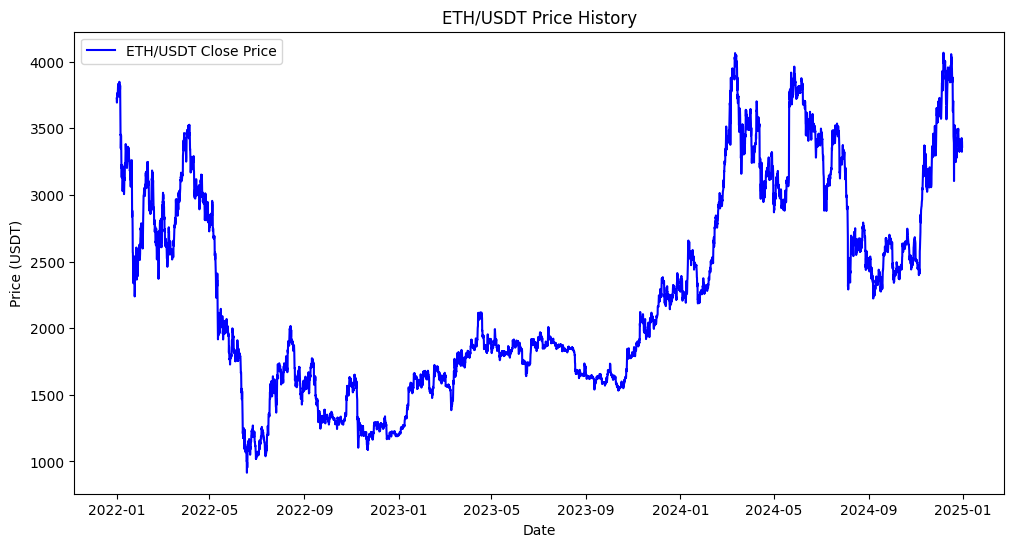

In [3]:

file_path = "ETH_4H_Updated_Data_with_ATR___Daily_Open_Close.csv" 
df_eth = pd.read_csv(file_path)


df_eth['Timestamp'] = pd.to_datetime(df_eth['Timestamp'])
df_eth.set_index('Timestamp', inplace=True)

eth_prices = df_eth[['Close']]

plt.figure(figsize=(12, 6))
plt.plot(eth_prices, label="ETH/USDT Close Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Price (USDT)")
plt.title("ETH/USDT Price History")
plt.legend()
plt.show()


In [4]:

scaler = MinMaxScaler(feature_range=(0, 1))
eth_prices_scaled = scaler.fit_transform(eth_prices)

eth_prices_scaled = pd.DataFrame(eth_prices_scaled, index=eth_prices.index, columns=['Close'])


In [5]:

def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback])
    return np.array(X), np.array(y)

lookback = 50
X, y = create_sequences(eth_prices_scaled.values, lookback)


split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]


print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (5216, 50, 1), y_train shape: (5216, 1)
X_test shape: (1304, 50, 1), y_test shape: (1304, 1)


In [6]:
# Define the LSTM model
model_eth = Sequential([
    LSTM(100, activation='relu', return_sequences=True, input_shape=(lookback, 1)),
    Dropout(0.2),
    LSTM(100, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer (predicting one value)
])

model_eth.compile(optimizer='adam', loss='mean_squared_error')


model_eth.summary()


/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,301 (473.83 KB)

 Trainable params: 121,301 (473.83 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:

history_eth = model_eth.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - loss: 0.0329 - val_loss: 0.0018
Epoch 2/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 26s 160ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 3/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - loss: 0.0020 - val_loss: 8.3283e-04
Epoch 4/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - loss: 0.0018 - val_loss: 8.5316e-04
Epoch 5/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 6/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0016 - val_loss: 5.9543e-04
Epoch 7/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0014 - val_loss: 6.3196e-04
Epoch 8/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - loss: 0.0014 - val_loss: 5.8074e-04
Epoch 9/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - loss: 0.0013 - val_loss: 9.3813e-04
Epoch 10/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - loss: 0.0012 - val_loss: 9.8529e-04
Epoch 11/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 0.0012 - val_loss: 4.5237e-04

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step


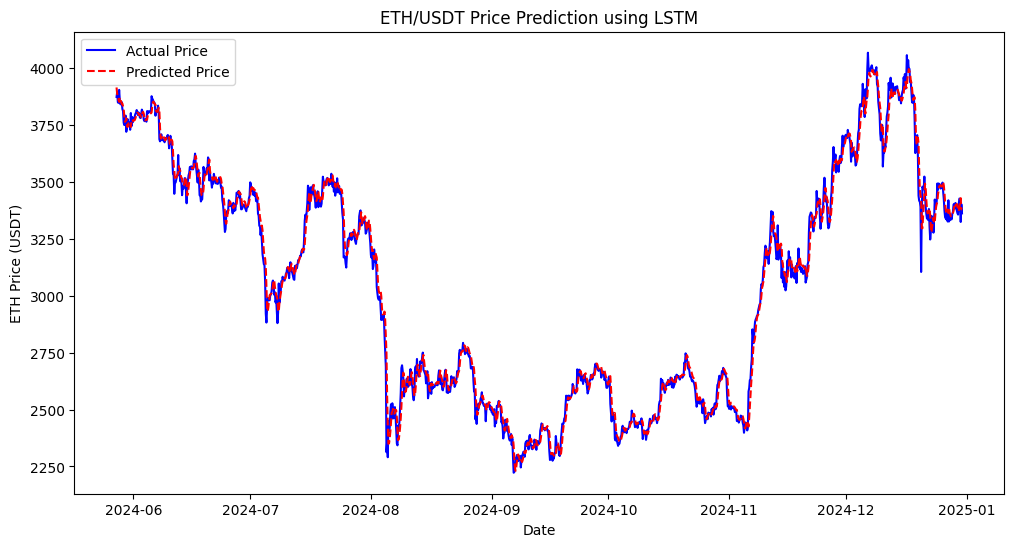

In [8]:

y_pred_eth = model_eth.predict(X_test)


y_test_actual_eth = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual_eth = scaler.inverse_transform(y_pred_eth)


plt.figure(figsize=(12, 6))
plt.plot(df_eth.index[-len(y_test_actual_eth):], y_test_actual_eth, label="Actual Price", color='blue')
plt.plot(df_eth.index[-len(y_pred_actual_eth):], y_pred_actual_eth, label="Predicted Price", color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("ETH Price (USDT)")
plt.title("ETH/USDT Price Prediction using LSTM")
plt.legend()
plt.show()


In [9]:
from sklearn.metrics import mean_squared_error

rmse_eth = np.sqrt(mean_squared_error(y_test_actual_eth, y_pred_actual_eth))
print(f"Root Mean Squared Error (RMSE) for ETH/USDT: {rmse_eth}")


Root Mean Squared Error (RMSE) for ETH/USDT: 47.62974447723276


In [13]:

from sklearn.metrics import mean_absolute_error


mae_eth = mean_absolute_error(y_test_actual_eth, y_pred_actual_eth)


mape_eth = np.mean(np.abs((y_test_actual_eth - y_pred_actual_eth) / y_test_actual_eth)) * 100


print(f"Mean Absolute Error (MAE) for ETH/USDT: {mae_eth}")
print(f"Mean Absolute Percentage Error (MAPE) for ETH/USDT: {mape_eth:.2f}%")


Mean Absolute Error (MAE) for ETH/USDT: 32.47665599237922
Mean Absolute Percentage Error (MAPE) for ETH/USDT: 1.08%
